   #                  Titanic_EDA_H SWATHI SHENOY(Batch -1)

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
DATA = pd.read_csv(r'D:\INTERNSHIP_2K20\MINI_PROJECT\TITANIC.csv')

In [265]:
DATA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1: Variable Identification

Identifying dependent and independent variables

Dependent varible:
1.Survived


Independent variables:
1.Pclass
2.Sex
3.Age
4.SibSp
5.Parch
6.Fare
7.Cabin
8.Embarked

## Step 2: Univariate Analysis

Categorical Variables - UNIVARIATE ANALYSIS


Visualization of the Categorical variable is shown through the BarPlot.

Text(0.5, 1.0, 'Survived plot')

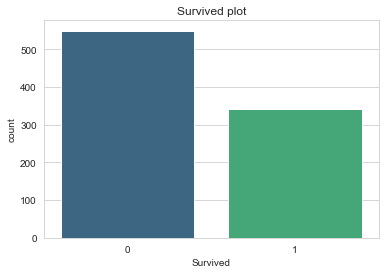

In [266]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=DATA,palette='viridis')
plt.title('Survived plot')

Text(0.5, 1.0, 'Pclass plot')

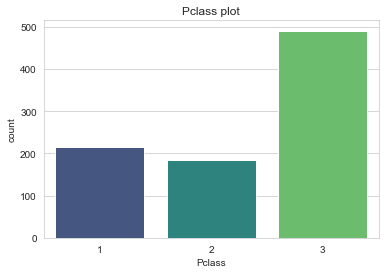

In [267]:
sns. countplot(x='Pclass',data=DATA,palette='viridis')
plt.title('Pclass plot')

Text(0.5, 1.0, 'Sex plot')

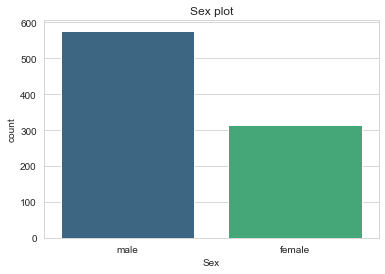

In [268]:
sns. countplot(x='Sex',data=DATA,palette='viridis')
plt.title('Sex plot')

Text(0.5, 1.0, 'Embarked plot')

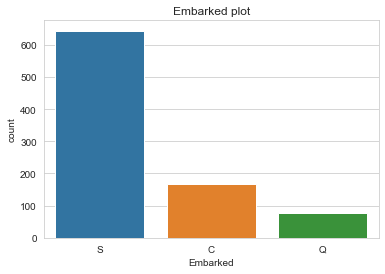

In [269]:
sns. countplot(x='Embarked',data=DATA)
plt.title('Embarked plot')

Continuous Variables - UNIVARIATE ANALYSIS

We can view graphical output through Box Plot and Histogram for Continuous variable

Text(0.5, 1.0, 'Age plot')

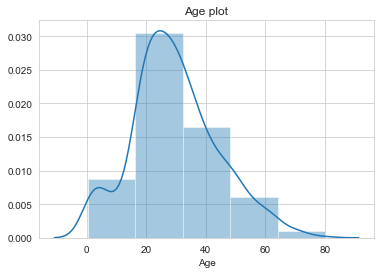

In [270]:
sns.distplot(DATA['Age'],bins=5)
plt.title('Age plot')

Text(0.5, 1.0, 'Fare plot')

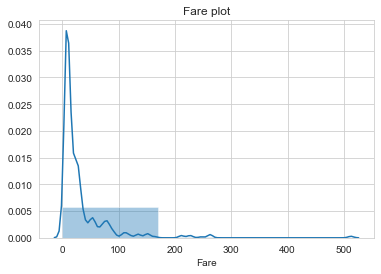

In [271]:
sns.distplot(DATA['Fare'],bins=3)
plt.title('Fare plot')

## Step 3: Bivariate Analysis

 Possible Combinations are:
 a. Continuous & Continuous\n
 b. Continuous & Categorical
 c. Categorical & Categorical

Categorical & Categorical

Text(0.5, 1.0, 'Survived v/s Sex')

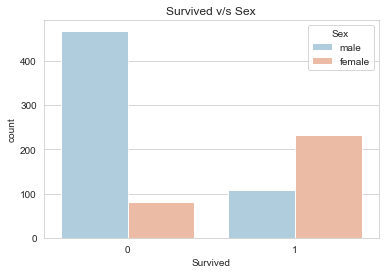

In [272]:
sns. countplot(x='Survived',hue='Sex',data=DATA,palette='RdBu_r')
plt.title('Survived v/s Sex')

Text(0.5, 1.0, 'Survived v/s Embarked')

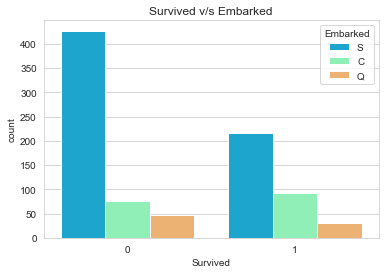

In [273]:
sns. countplot(x='Survived',hue='Embarked',data=DATA,palette='rainbow')
plt.title('Survived v/s Embarked')

Text(0.5, 1.0, 'Survived v/s Pclass')

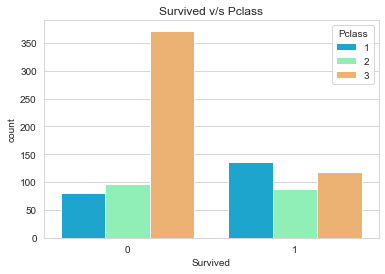

In [274]:
sns. countplot(x='Survived',hue='Pclass',data=DATA,palette='rainbow')
plt.title('Survived v/s Pclass')

Categorical & Continuous

In [275]:
bins=[0,18,60,80]
grps=['Children(0-18)','Adult(18-60)','Oldage(60+)']
age_grp=pd.cut(DATA['Age'],bins,labels=grps)
pd.crosstab(age_grp,DATA['Survived'])

Survived,0,1
Age,,
Children(0-18),69,70
Adult(18-60),338,215
Oldage(60+),17,5


Text(0.5, 1.0, 'Survived v/s Age')

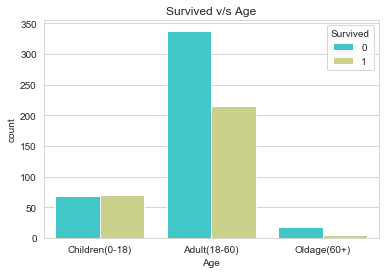

In [276]:
sns.countplot(x = pd.cut(DATA['Age'],bins,labels=grps),hue='Survived',data=DATA,palette='rainbow')
plt.title('Survived v/s Age')

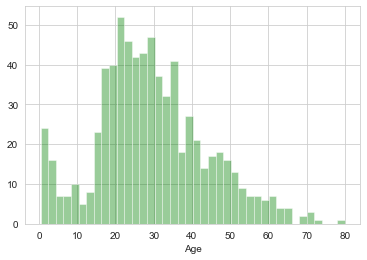

In [277]:
sns.distplot(DATA['Age'].dropna(),kde = False,color ='green',bins = 40)

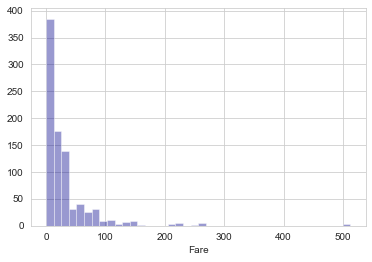

In [278]:
sns.distplot(DATA['Fare'].dropna(),kde=False,color='darkblue',bins=40)

## Step 4: Missing Values Treatment


Check if there are any null values in the given data

In [279]:
DATA.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Visual representation of null vaues in the given data set

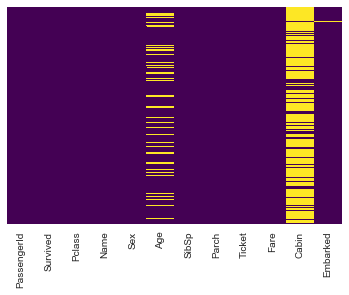

In [280]:
sns.heatmap(DATA.isnull(),yticklabels = False,cbar = False,cmap ='viridis')

To find the missing values of age,we consider the relation between Age and Pclass

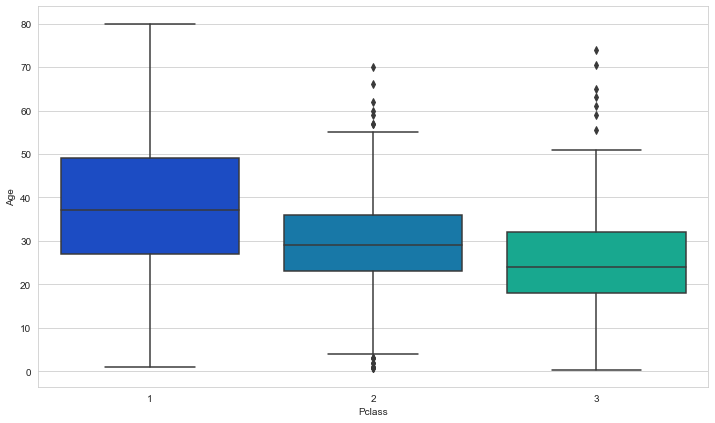

In [281]:
plt.figure(figsize =(12,7))
sns.boxplot(x ='Pclass',y ='Age',data = DATA,palette ='winter')

In [282]:
def missed_age(cols):
    Age = cols[0]
    Pclass = cols[1]  
        
    if pd.isnull(Age):
        if Pclass == 1:
             return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [283]:
DATA['Age']= DATA[['Age','Pclass']].apply(missed_age,axis=1)

In [284]:
DATA['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

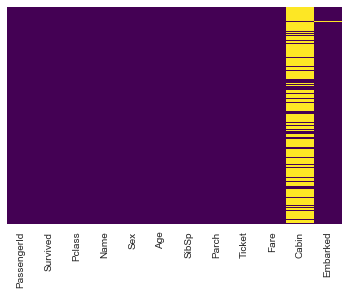

In [285]:
sns.heatmap(DATA.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since majority values of Cabin parameter are missing,the whole column is removed

In [286]:
DATA.drop(['Cabin'],axis=1,inplace=True)


In [287]:
DATA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [288]:
DATA.dropna(inplace=True)

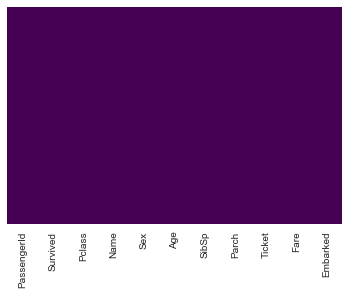

In [289]:
sns.heatmap(DATA.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Step 5: Outliers

 Outliers can be detected using boxplots and scatter plots

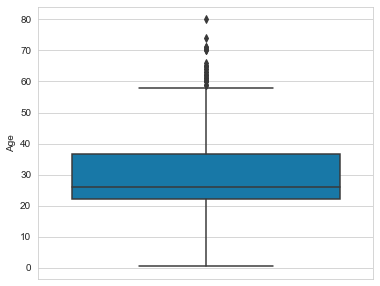

In [290]:
plt.figure(figsize=(6,5))
sns.boxplot(y='Age',data=DATA,palette='winter')

In [291]:
DATA['Age'].describe()

count    889.000000
mean      29.019314
std       13.209814
min        0.420000
25%       22.000000
50%       26.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64

In [292]:
DATA['Age'].quantile(0.75)

36.5

In [293]:
DATA['Age'].quantile(0.25)

22.0

In [294]:
DATA['Age'].median()

26.0

In [295]:
OL=DATA['Age'].quantile(0.75)-DATA['Age'].quantile(0.25)
OL

14.5

In [296]:
upper_outlierlimit=DATA['Age'].quantile(0.75)+1.5*OL
lower_outlierlimit=DATA['Age'].quantile(0.25)-1.5*OL
print(upper_outlierlimit)
print(lower_outlierlimit)

58.25
0.25


In [297]:
outliervalues=DATA[(DATA['Age']>=upper_outlierlimit)|(DATA['Age']<=lower_outlierlimit)]

outliervalues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q


In [298]:
outliervalues.reset_index(inplace=True)

In [299]:
outliervalues

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
1,54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
2,94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
3,96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
4,116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
5,170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
6,232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,S
7,252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S
8,275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
9,280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q


In [300]:
for i in outliervalues['index']:
    if DATA['Age'][i]>=upper_outlierlimit:
      DATA['Age'][i]=DATA['Age'].quantile(0.95)

    else:
      DATA['Age'][i]=DATA['Age'].quantile(0.25)
      


D:\Softwares\ANACONDA_PYTHON3.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


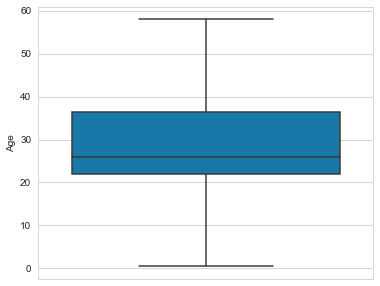

In [301]:
plt.figure(figsize=(6,5))
sns.boxplot(y='Age',data=DATA,palette='winter')

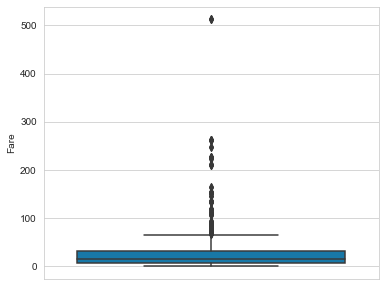

In [302]:
plt.figure(figsize=(6,5))
sns.boxplot(y='Fare',data=DATA,palette='winter')


In [303]:
DATA['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [304]:
DATA['Fare'].quantile(0.75)

31.0

In [305]:
DATA['Fare'].quantile(0.25)

7.8958

In [306]:
DATA['Fare'].median()

14.4542

In [307]:
OL1=DATA['Fare'].quantile(0.75)-DATA['Fare'].quantile(0.25)
OL1

23.1042

In [308]:
upper_outlierlimit2=DATA['Fare'].quantile(0.75)+1.5*OL1
lower_outlierlimit2=DATA['Fare'].quantile(0.25)-1.5*OL1
print(upper_outlierlimit2)
print(lower_outlierlimit2)

65.6563
-26.7605


In [309]:
outliervalues2= DATA[(DATA['Fare']>=upper_outlierlimit2)|(DATA['Fare']<=lower_outlierlimit2)]
outliervalues2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.0,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,24.0,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,37.0,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,S


In [310]:
outliervalues2.reset_index(inplace=True)

In [311]:
outliervalues2

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
1,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
2,31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.0,1,0,PC 17569,146.5208,C
3,34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
4,52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...,...
109,846,847,0,3,"Sage, Mr. Douglas Bullen",male,24.0,8,2,CA. 2343,69.5500,S
110,849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,37.0,1,0,17453,89.1042,C
111,856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
112,863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,S


In [312]:
for m in outliervalues2['index']:
    if DATA['Fare'][m]>=upper_outlierlimit2:
      DATA['Fare'][m]=DATA['Fare'].median()
    else:
      DATA['Fare'][m]=DATA['Fare'].median()

D:\Softwares\ANACONDA_PYTHON3.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


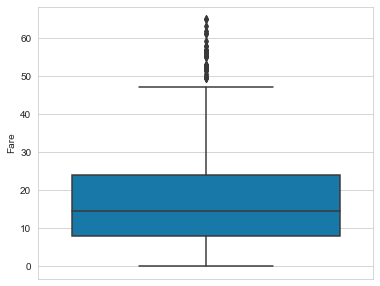

In [313]:
plt.figure(figsize=(6,5))
sns.boxplot(y='Fare',data=DATA,palette='winter')

## Step 6: Feature Engineering - Variable and Dummy Variable Creation

In [314]:
DATA.dtypes==np.object

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool

In [315]:
sex= pd.get_dummies(DATA['Sex'],drop_first=True).head()
sex

,male
0,1
1,0
2,0
3,0
4,1


In [316]:
embark=pd.get_dummies(DATA['Embarked'],drop_first=True).head()
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [317]:
DATA.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [318]:
DATA.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,14.4542
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [319]:
DATA= pd.concat([DATA,sex,embark],axis=1)


In [320]:
DATA.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,14.4542,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [321]:
DATA.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,38.0,1,0,14.4542,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [322]:
DATA['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64